In [ ]:
#EDITS - change model_skip to skip_model - find replace
#create embezzing size variables for each corpus

In [35]:
##### Importing Packages
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

from gensim.corpora.textcorpus import TextCorpus
from gensim.test.utils import datapath
from gensim import utils

import numpy as np
import pandas as pd
import nltk
import glob
import os
import re
import platform, sys, smart_open

import sklearn
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

In [ ]:
### import NLTK corpus
#nltk.download('brown')
from nltk.corpus import brown
corpus1 = brown.sents()

In [ ]:
### open text file
path = "C:\\Users\\alwer\\Desktop\\Coding Working Group\\corpus.txt"
file = open(path, encoding = "utf8", errors='ignore')
text = file.read()

In [ ]:
### Tokenizing Corpus
corpus2 = nltk.sent_tokenize(text)

In [ ]:
##### Building Your Model - CBOW
model_cbow = Word2Vec(corpus1, size=100, window=5, min_count=1, workers=12, iter=2)
model_cbow.save("word2vec_cbow.model")

In [ ]:
##### Building Your Model - Skip-gram
model_skip = Word2Vec(corpus1, size=100, window=10, min_count=1, workers=12, iter=2,sg=1)
model_skip.save("word2vec_skip.model")

In [ ]:
##### Training Pre-Loaded Model Further
model_skip_train = Word2Vec.load("word2vec_skip.model")
model_skip_train.train(corpus2, total_examples=1, epochs=2)

In [ ]:
###### Exploring Your Model
vector2 = model_cbow.wv['web']
print(vector2)
vector1 = model_skip.wv['web']
print(vector1)
vector = model_skip_train.wv['web']
print(vector)

In [ ]:
#### Similar Words
print(model_skip.similarity('computer', 'human'))
print(model_skip.similarity('dog', 'human'))

In [ ]:
### Similar words
similar_words = {search_term: [item[0] for item in model_skip.wv.most_similar([search_term], topn=10)]
                  for search_term in ['god', 'table', 'computer', 'human', 'dog', 'plant', 'love','hate']}
similar_words

In [ ]:
### Doesn't Match
model_cbow.doesnt_match("woman ovarian brain".split())

In [ ]:
### Most Similar
model_cbow.most_similar(positive=["model"])

In [13]:
#### similarity b/t two words
# https://github.com/laurenfklein/emory-qtm340/blob/master/notebooks/class12-word-vectors-complete.ipynb
print(model_skip.wv.similarity(w1="freedom",w2="justice"))
print(model_skip.wv.similarity(w1="freedom",w2="slavery"))

0.9880948
0.9325812


In [14]:
###### analogies
# format is: "man is to king as woman is to ???"
model_skip.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('seventeen', 0.9619800448417664),
 ('Over', 0.9616180658340454),
 ('printed', 0.9605631232261658),
 ('Several', 0.9603448510169983),
 ('nights', 0.9597506523132324),
 ('Eve', 0.9583559036254883),
 ('Far', 0.9577738046646118),
 ('About', 0.9573948383331299),
 ('Five', 0.9573838114738464),
 ('anniversary', 0.9573163986206055)]

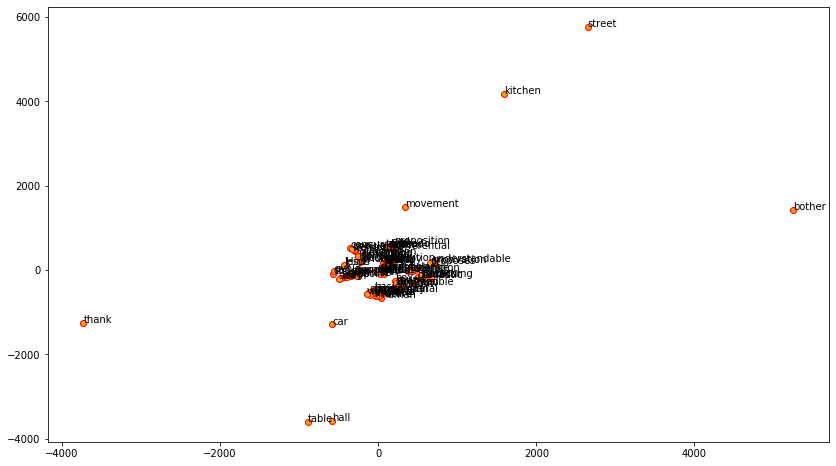

In [15]:
###### Visualize Similar Words
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model_skip.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)

labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [21]:
# Tensorboard Projections
from tensorboard.plugins import projector
import tensorflow as tf

import logging
"C:\\Users\\alwer\Desktop\\Coding Working Group\\"
# For displaying gensim logs
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)

weights     = model_skip.wv.vectors
index_words = model_skip.wv.index2word

vocab_size    = weights.shape[0]
embedding_dim = weights.shape[1]

print('Shape of weights:', weights.shape)
print('Vocabulary size: %i' % vocab_size)
print('Embedding size: %i'  % embedding_dim)

with open(os.path.join("C:\\Users\\alwer\Desktop\\Coding Working Group\\",'metadata.tsv'), 'w') as f:
    f.writelines("\n".join(index_words))  

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = 'embeddings'
embedding.metadata_path = './metadata.tsv'
projector.visualize_embeddings("C:\\Users\\alwer\Desktop\\Coding Working Group\\", config)

tensor_embeddings = tf.Variable(model_skip.wv.vectors, name='embeddings')

checkpoint = tf.compat.v1.train.Saver([tensor_embeddings])
checkpoint_path = checkpoint.save(sess=None, global_step=None, save_path=os.path.join("C:\\Users\\alwer\Desktop\\Coding Working Group\\", "model.ckpt"))

Shape of weights: (56057, 100)
Vocabulary size: 56057
Embedding size: 100


In [27]:
%load_ext tensorboard
%tensorboard --logdir=logs
#default: http://localhost:6006/
# in command prompt: tensorboard --logdir="C:\\Users\\alwer\Desktop\\Coding Working Group\\" --host localhost --port 8088
# go to http://localhost:8088 

SyntaxError: invalid syntax (<ipython-input-27-f9360a10b266>, line 4)

In [28]:
# Tensorboard Projections 2
from tensorboard.plugins import projector
import tensorflow as tf

weights     = model_cbow.wv.vectors
index_words = model_cbow.wv.index2word

vocab_size    = weights.shape[0]
embedding_dim = weights.shape[1]

print('Shape of weights:', weights.shape)
print('Vocabulary size: %i' % vocab_size)
print('Embedding size: %i'  % embedding_dim)

with open(os.path.join("C:\\Users\\alwer\Desktop\\Coding Working Group\\",'metadata.tsv'), 'w') as f:
    f.writelines("\n".join(index_words))  

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = 'embeddings'
embedding.metadata_path = './metadata.tsv'
projector.visualize_embeddings("C:\\Users\\alwer\Desktop\\Coding Working Group\\", config)

tensor_embeddings = tf.Variable(model_cbow.wv.vectors, name='embeddings')

checkpoint = tf.compat.v1.train.Saver([tensor_embeddings])
checkpoint_path = checkpoint.save(sess=None, global_step=None, save_path=os.path.join("C:\\Users\\alwer\Desktop\\Coding Working Group\\", "model1.ckpt"))

Shape of weights: (56057, 100)
Vocabulary size: 56057
Embedding size: 100


In [34]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir=logs
#default: http://localhost:6006/
# in command prompt: tensorboard --logdir="C:\\Users\\alwer\Desktop\\Coding Working Group\\" --host localhost --port 6006
# go to http://localhost:6066 

Reusing TensorBoard on port 6006 (pid 122600), started 0:48:30 ago. (Use '!kill 122600' to kill it.)

In [ ]:
###### Word Embeddings of Multiple Documents

In [ ]:
### Import Documents into Corpus
import glob
import os
file_list = glob.glob(os.path.join(os.getcwd(),"C:\\Users\\alwer\\Desktop\\Coding Working Group\\test", "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path, encoding = "utf8", errors='ignore') as f_input:
        corpus.append(f_input.read())
        
print(corpus[:2])  

# Change File List to Title - to work on
my_dir = "C:\\Users\\alwer\\Desktop\\Coding Working Group\\test"
filelist = []
filesList = []
os.chdir( my_dir )

# Step 2: Build up list of files:
for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filelist.append(fileName) #filename without extension
    
# Import Documents into Dataframe
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Title': filelist, 'Text': corpus})
corpus_df = corpus_df[['Title', 'Text']]
corpus_df

In [ ]:
### Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = Word2Vec(corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50, sg=1)

In [ ]:
### Visualize Document Corpus Embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=250, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

In [ ]:
##### Import GLoVe (Untested)

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('test_glove.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file

In [ ]:
#### KeyedVectors

from gensim.models import KeyedVectors
path = get_tmpfile("wordvectors.kv")
model.wv.save(path)
model.wv.save("model.wv")

In [ ]:
filename = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
wv = KeyedVectors.load("model.wv", mmap='r')

In [ ]:
vector = wv['computer']

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = "glove.txt"
word2vec_output_file = "word2vec.txt"
glove2word2vec(glove_input_file, word2vec_output_file)
m = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
###### Further Cleaning (Alternate)
import numpy as np

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(corpus2):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

sents_clean = np.vectorize(normalize_document)

In [ ]:
##### Doc2Vec (Test)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_df)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [ ]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!

model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
vector = model.infer_vector(["system", "response"])
print(vector)

In [ ]:
##https://praveenbezawada.com/2018/01/25/document-similarity-using-gensim-dec2vec/

class TaggedDocumentIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])
 
docLabels = list(corpus_df['Title'])
data = list(corpus_df['Text'])
sentences = TaggedDocumentIterator(data, docLabels)

In [ ]:
model = Doc2Vec(size=100, window=10, min_count=5, workers=11,alpha=0.025, iter=20)
model.build_vocab(sentences)
model.train(sentences,total_examples=model.corpus_count, epochs=model.iter)

In [ ]:
# Store the model to mmap-able files
model.save('/tmp/model_docsimilarity.doc2vec')
# Load the model
model = Doc2Vec.load('/tmp/model_docsimilarity.doc2vec')

In [ ]:
# Open Text File
import io
with io.open("corpus.txt",'r',encoding='utf8',errors='ignore') as f:
   text = f.read()

In [ ]:
def test_predict():
    #Select a random document for the document dataset
    rand_int = np.random.randint(0, corpus_df.shape[0])
    print ('Random int {}'.format(rand_int))
    test_corpus_df = corpus_df.iloc[rand_int]['info']
    label = corpus_df.iloc[rand_int, corpus_df.columns.get_loc('problemReportId')]
 
    #Clean the document using the utility functions used in train phase
    test_corpus_df = default_clean(test_corpus_df)
    test_corpus_df = stop_and_stem(test_corpus_df, stem=False)
 
    #Convert the corpus_df document into a list and use the infer_vector method to get a vector representation for it
    new_doc_words = test_corpus_df.split()
    new_doc_vec = model.infer_vector(new_doc_words, steps=50, alpha=0.25)
 
    #use the most_similar utility to find the most similar documents.
    similars = model.docvecs.most_similar(positive=[new_doc_vec])
test_predict()